In [2]:
import pandas as pd
import numpy as np

 <a id ='step1'></a>
 # Load the data

In [3]:
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data"
# data of cleveland (raw data)
# data = pd.read_csv(url,header=None)
# data.to_csv('data/cleveland.csv', index=None)

In [4]:
df = pd.read_csv('data/cleveland.csv')

In [5]:
df.shape

(303, 14)

In [6]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

<a id= 'missing_data'></a>

<a id = 'missing_data'></a>
# Identify and Deal with the missing data

In [7]:
df['ca'].unique()
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [8]:
df = pd.DataFrame(df)

In [9]:
df.loc[(df['ca'] == '?') | (df['thal'] == '?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [10]:
drop_rows = df.loc[(df['ca'] == '?') | (df['thal'] == '?')]

In [11]:
df_no_miss = df.loc[ (df['ca'] != '?') & (df['thal'] != '?') ]

In [12]:
len(df_no_miss)

297

In [13]:
df_no_miss['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [14]:
df_no_miss.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# The predicted attribute
**num: diagnosis of heart disease (angiographic disease status)**
   - Value 0: < 50% diameter narrowing
   - Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels)

In [15]:
X = df_no_miss.drop('num', axis = 1).copy() #use copy so that the original data reamin with us

In [16]:
y = df_no_miss['num'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: num, dtype: int64

In [17]:
X.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
dtype: object

In [18]:
for col in X.columns:
    print("{}: {}\n".format(col, X[col].unique()))
    

age: [63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]

sex: [1. 0.]

cp: [1. 4. 3. 2.]

trestbps: [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]

chol: [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 217. 288. 220. 209. 227. 261. 174. 281.
 221. 205. 240. 289. 318

- **sex**: sex (1 = male; 0 = female)
- **cp**: chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- **trestbps**: resting blood pressure (in mm Hg on admission to the hospital)
- **chol**: serum cholestoral in mg/dl
- **fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- **restecg**: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05  mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- **thalach**: maximum heart rate achieved
- **exang**: exercise induced angina (1 = yes; 0 = no)
- **oldpeak** = ST depression induced by exercise relative to rest
-  **slope**: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
-  **ca**: number of major vessels (0-3) colored by flourosopy
- **thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect
- **num**: diagnosis of heart disease (angiographic disease status)
    - Value 0: < 50% diameter narrowing
    - Value 1: > 50% diameter narrowing
    (in any major vessel: attributes 59 through 68 are vessels)

<a id = 'one_hot_encoding'></a>
# Format the data for Decision trees using One-Hot encoding

In [19]:
pd.get_dummies(X, columns=['cp']).head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [20]:
X_dummify = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'])

In [21]:
X_dummify.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [22]:
y.unique()

array([0, 2, 1, 3, 4])

In [23]:
y.head(10)

0    0
1    2
2    1
3    0
4    0
5    0
6    3
7    0
8    2
9    1
Name: num, dtype: int64

In [24]:
y_not_zero = y > 0

In [25]:
y[y_not_zero] = 1

In [26]:
y.head(15)

0     0
1     1
2     1
3     0
4     0
5     0
6     1
7     0
8     1
9     1
10    0
11    0
12    1
13    0
14    0
Name: num, dtype: int64

In [27]:
y.unique()

array([0, 1])

<a id='simple_dt'></a>
# Simple Decision Classification Tree 

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [29]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 42)

In [30]:
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(Xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [31]:
clf.score

<bound method ClassifierMixin.score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')>

In [32]:
from sklearn.metrics import plot_confusion_matrix

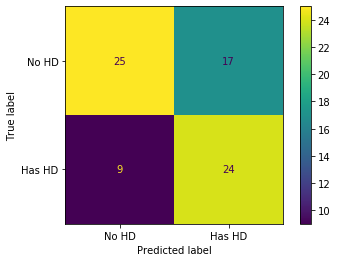

In [33]:
plot_confusion_matrix(clf, Xtest, ytest, display_labels = ["No HD", "Has HD"])

In [34]:
25/42

0.5952380952380952

In [35]:
24/33

0.7272727272727273

- correctly classified for : No HD = 59.52%
- correctly classified for : Has HD = 72.72%

<a id='ccp_prune_dt'></a>
# Pruning the decision tree with cost complexity pruning
 - **Cost Complexity Pruning Part 1: Visualize Alpha**

**Decision Trees** are susceptible to overfitting so pruning is necessary in a hope to imporve the accuracy on **Testing DataSet**.
- Finding the right value for pruning parameter: *alpha*, which control how much or little do pruning happens
- Plot accuracy as a function of alpha for both the **Training and Testing Dataset**
- Omit the use of maximum value of alpha because it prunes all the leaves leaving only the root instead of a tree:

``ccp_alphas = ccp_alphas[:-1] ``

In [36]:
path = clf.cost_complexity_pruning_path(Xtrain, ytrain)

In [37]:
path

{'ccp_alphas': array([0.        , 0.00295295, 0.00337838, 0.0036036 , 0.003861  ,
        0.00405405, 0.0041184 , 0.00429358, 0.00541298, 0.00563063,
        0.00578761, 0.00600601, 0.00600601, 0.00600601, 0.00655201,
        0.00667591, 0.00757375, 0.00796251, 0.00811505, 0.01038181,
        0.0105777 , 0.01422475, 0.01604051, 0.01642461, 0.02103075,
        0.03680006, 0.03934523, 0.13046216]),
 'impurities': array([0.        , 0.00885886, 0.01561562, 0.02282282, 0.03826684,
        0.04637495, 0.05461175, 0.06319891, 0.08485082, 0.09611208,
        0.1134749 , 0.12548691, 0.13749892, 0.14350493, 0.15005693,
        0.15673284, 0.16430659, 0.1722691 , 0.18849919, 0.19888101,
        0.2094587 , 0.2379082 , 0.25394872, 0.27037333, 0.29140408,
        0.32820413, 0.36754937, 0.49801153])}

In [39]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [40]:
ccp_alphas = ccp_alphas[:-1]

In [41]:
clf_dt_ls= [] #list of decision tree classifiers for each alphas
for alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = alpha)
    clf_dt.fit(Xtrain, ytrain)
    clf_dt_ls.append(clf_dt)

In [42]:
train_scores = [clf_dt.score(Xtrain, ytrain) for clf_dt in clf_dt_ls]
test_scores  = [clf_dt.score(Xtest, ytest) for clf_dt in clf_dt_ls]

In [43]:
import matplotlib.pyplot as plt

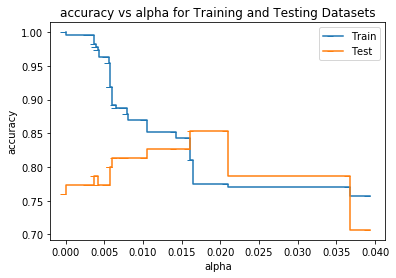

In [44]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for Training and Testing Datasets")
ax.plot(ccp_alphas, train_scores, marker = 0, label = "Train", drawstyle = "steps")
ax.plot(ccp_alphas, test_scores, marker = 0, label = "Test", drawstyle = "steps")
ax.legend()
plt.show()

In [45]:
alpha16 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
alpha16.fit(Xtrain, ytrain)
print("training score: {}".format( alpha16.score(Xtrain, ytrain)))
print( "testing score: {}".format(alpha16.score(Xtest, ytest)))

training score: 0.8513513513513513
testing score: 0.8266666666666667


In [46]:
alpha16 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.015)
alpha16.fit(Xtrain, ytrain)
print("training score: {}".format( alpha16.score(Xtrain, ytrain)))
print( "testing score: {}".format(alpha16.score(Xtest, ytest)))

training score: 0.8513513513513513
testing score: 0.8266666666666667


- **Cross validation**

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
clf_cv = DecisionTreeClassifier(random_state=42, ccp_alpha= 0.016)
scores = cross_val_score(clf_cv,X = Xtrain, y = ytrain, cv = 5)

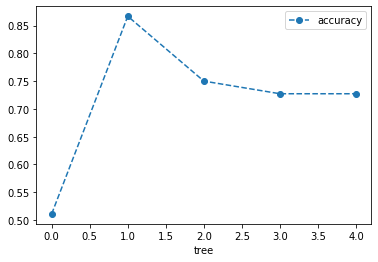

In [52]:
df = pd.DataFrame(data = {'tree': range(5),'accuracy': scores})
df.plot(x= 'tree', y = 'accuracy', marker='o', linestyle = '--')

Conclusion: Different training data sets results in different accuracies

**Optimal value for ccp_alpha**
- **Now, using cross validation to find optimal value for`` ccp_apha``**

In [53]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    scores = cross_val_score(clf_dt, Xtrain, ytrain, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

In [73]:
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha','mean_accuracy','std_dev'])

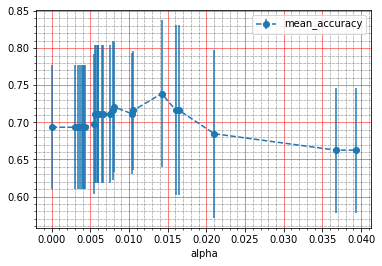

In [74]:
fig, ax = plt.subplots()
alpha_results.plot(x='alpha',
                  y = 'mean_accuracy',
                  yerr= 'std_dev',
                  marker = 'o',
                  linestyle = '--',
                  subplots = True,
                  grid=True,
                  ax=ax)
ax.set_axisbelow(True)
ax.minorticks_on()

ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')

ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

**Conclusion**: The optimal value of alpha is : slightly greater than 0.014, with max accuracy at 0.74.

In [75]:
alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std_dev
21,0.014225,0.738788,0.098832


In [78]:
optimum_alpha = alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]['alpha']

In [80]:
print(optimum_alpha)

21    0.014225
Name: alpha, dtype: float64


In [81]:
optimum_alpha = float(optimum_alpha)

In [82]:
optimum_alpha

0.014224751066856332

<a id='final_dt'></a>
# Building the final classification tree

In [83]:
clf_tree_pruned = DecisionTreeClassifier(random_state= 42, ccp_alpha = optimum_alpha)
clf_tree_pruned = clf_tree_pruned.fit(Xtrain, ytrain)

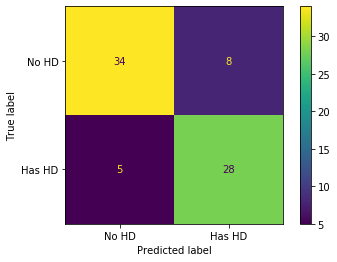

In [87]:
#PRUNED TREE's Confusion Matrix
plot_confusion_matrix(clf_tree_pruned, Xtest, ytest, display_labels=["No HD", "Has HD"])

- **Compare pruned tree Vs Full sized Tree**

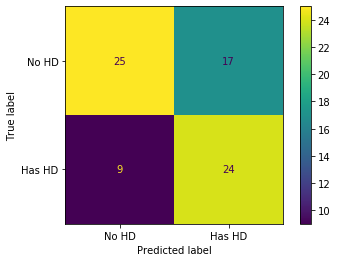

In [88]:
#FUll SIZED TREE's Confusion Matrix
plot_confusion_matrix(clf, Xtest, ytest, display_labels = ["No HD", "Has HD"])

**Conclusion**
- --> Correct Heart disease prediction: from 72.7 % to 84.85 %( with pruning)
- --> Correct no Heart disease prediciton: from 59.52% to 80.95%(with pruning)

In [89]:
from sklearn.tree import plot_tree

[Text(482.8846153846154, 356.7375, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = NO HD'),
 Text(257.53846153846155, 254.8125, 'thal <= 6.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = NO HD'),
 Text(128.76923076923077, 152.8875, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = NO HD'),
 Text(64.38461538461539, 50.96249999999998, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = NO HD'),
 Text(193.15384615384616, 50.96249999999998, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = HAS HD'),
 Text(386.3076923076923, 152.8875, 'cp <= 3.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = HAS HD'),
 Text(321.9230769230769, 50.96249999999998, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = NO HD'),
 Text(450.69230769230774, 50.96249999999998, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = HAS HD'),
 Text(708.2307692307693, 254.8125, 'cp <= 3.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = HAS HD'),
 Text(6

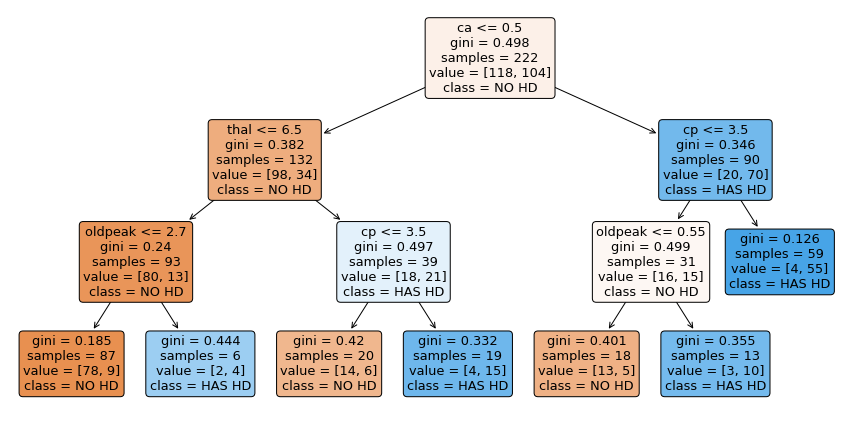

In [91]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_tree_pruned,
         filled = True,
         rounded = True,
         class_names = ['NO HD', 'HAS HD'],
         feature_names = X.columns)

- **Value** : [NO hd, has had], so root node has 118 samples with NO HD and 104 samples with HD
- **gini**  : It's a gini score for each node
- **class** : Represents the majority class by numbers

    The nodes and leaves are colored by the class. In this case , NO is different shades of orange color and Yes is different shades of Blue. The darker the shade, the lower is the gini score. That tells us how much the node or leaf is skewed towards one class.


## Processes in a nutshell:
- <a href='#step1'>Loaded the data from the UCI ML dataset repository</a>
- <a href='#missing_data'>Identified and dealt with the missing data</a>
- <a href='#one_hot_encoding'>Formatted the data for Decision trees using One-Hot encoding</a>
- <a href='#simple_dt'>Built a decision tree for classification</a>
- <a href='#ccp_prune_dt'>Pruned the decision tree with cost complexity pruning</a>
- <a href='#final_dt'>Built, Drew and visualize the final decison tree with the ideal alpha value</a>